# SHAP: Shapley Values for Machine Learning Explainability

## What is SHAP?

SHAP (SHapley Additive exPlanations) is a method for explaining individual predictions by computing the contribution of each feature to the prediction. It's based on cooperative game theory, specifically Shapley values, which provide a fair way to distribute the "gains" among players in a cooperative game.

## The Core Intuition

Imagine you and your friends are baking a cake together. Each person contributes different ingredients and skills. At the end, you want to fairly divide the credit for how delicious the cake turned out. Some questions arise:

- What if Alice is amazing at mixing but terrible at measuring?
- What if Bob's chocolate chips are the star ingredient?
- How do we account for the fact that flour and eggs work better together than alone?

This is exactly what SHAP does for machine learning models! It asks: **"How much did each feature contribute to this specific prediction?"**

## The Mathematical Foundation

### Shapley Values from Game Theory

In cooperative game theory, the Shapley value $\phi_i$ for player $i$ is:

$$\phi_i(v) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(n-|S|-1)!}{n!}[v(S \cup \{i\}) - v(S)]$$

Where:
- $N$ is the set of all players (features)
- $S$ is a subset of players not including $i$
- $v(S)$ is the value function (model output) for subset $S$
- $n$ is the total number of players

### Translation to Machine Learning

In ML context:
- **Players** = Features in your dataset
- **Game value** = Model prediction
- **Coalition** = Subset of features used for prediction

The SHAP value for feature $i$ tells us: *"On average, how much does including feature $i$ change the model's prediction across all possible combinations of other features?"*

## Key Properties of SHAP Values

SHAP values satisfy four important properties that make them theoretically sound:

### 1. Efficiency (Sum to Difference)
$$\sum_{i=1}^{n} \phi_i = f(x) - E[f(X)]$$

The sum of all SHAP values equals the difference between the model's prediction and the expected prediction.

### 2. Symmetry
If two features contribute equally to all coalitions, they receive equal SHAP values.

### 3. Dummy Feature
Features that don't change the model output get zero SHAP values.

### 4. Additivity
For ensemble models, SHAP values add up correctly across individual models.

## Intuitive Example: House Price Prediction

Let's say we're predicting house prices with these features:
- Size: 2000 sq ft
- Location: Downtown
- Age: 10 years

Our model predicts $400,000, while the average house price is $300,000.

SHAP asks: "How do we fairly distribute the extra $100,000 among our three features?"

Maybe:
- Size contributes: +$60,000
- Location contributes: +$50,000  
- Age contributes: -$10,000

Total: $60k + $50k - $10k = $100k ✓

## Step-by-Step Example: Computing SHAP Values by Hand

Let's work through a concrete example to see exactly how SHAP values are calculated. We'll use a simple scenario with just 3 features to keep the math manageable.

### The Setup

**Scenario**: Predicting if someone will buy a premium coffee subscription

**Features**:
- $x_1$: Income level (High = 1, Low = 0)
- $x_2$: Coffee consumption (Heavy = 1, Light = 0)  
- $x_3$: Age (Young = 1, Old = 0)

**Instance to explain**: $(x_1=1, x_2=1, x_3=0)$ - High income, heavy coffee drinker, older person

**Model outputs** (probability of subscription):
- $f(\emptyset) = 0.1$ (baseline: no features)
- $f(\{1\}) = 0.3$ (only income)
- $f(\{2\}) = 0.4$ (only coffee consumption)
- $f(\{3\}) = 0.2$ (only age)
- $f(\{1,2\}) = 0.7$ (income + coffee)
- $f(\{1,3\}) = 0.4$ (income + age)
- $f(\{2,3\}) = 0.5$ (coffee + age)
- $f(\{1,2,3\}) = 0.8$ (all features)

### Computing SHAP Value for Income ($x_1$)

The SHAP value measures the average marginal contribution of income across all possible coalitions.

**Step 1**: List all possible coalitions that don't include income:
- $S = \emptyset$ (no other features)
- $S = \{2\}$ (only coffee consumption)
- $S = \{3\}$ (only age)
- $S = \{2,3\}$ (coffee consumption and age)

**Step 2**: For each coalition, compute marginal contribution of adding income:
- $\emptyset$: $f(\{1\}) - f(\emptyset) = 0.3 - 0.1 = 0.2$
- $\{2\}$: $f(\{1,2\}) - f(\{2\}) = 0.7 - 0.4 = 0.3$
- $\{3\}$: $f(\{1,3\}) - f(\{3\}) = 0.4 - 0.2 = 0.2$
- $\{2,3\}$: $f(\{1,2,3\}) - f(\{2,3\}) = 0.8 - 0.5 = 0.3$

**Step 3**: Weight each marginal contribution by coalition probability:

For $n=3$ features, the weight for coalition of size $|S|$ is: $\frac{|S|!(n-|S|-1)!}{n!}$

- $S = \emptyset$ (size 0): weight = $\frac{0! \cdot 2!}{3!} = \frac{2}{6} = \frac{1}{3}$
- $S = \{2\}$ (size 1): weight = $\frac{1! \cdot 1!}{3!} = \frac{1}{6}$
- $S = \{3\}$ (size 1): weight = $\frac{1! \cdot 1!}{3!} = \frac{1}{6}$
- $S = \{2,3\}$ (size 2): weight = $\frac{2! \cdot 0!}{3!} = \frac{2}{6} = \frac{1}{3}$

**Step 4**: Compute weighted average:
$\phi_1 = \frac{1}{3} \cdot 0.2 + \frac{1}{6} \cdot 0.3 + \frac{1}{6} \cdot 0.2 + \frac{1}{3} \cdot 0.3$
$\phi_1 = 0.067 + 0.050 + 0.033 + 0.100 = 0.25$

### Quick Computation for Other Features

**SHAP value for Coffee Consumption ($x_2$)**:
- Marginal contributions: $[0.3, 0.4, 0.3, 0.3]$ (same coalitions as above)
- Weighted average: $\phi_2 = \frac{1}{3} \cdot 0.3 + \frac{1}{6} \cdot 0.4 + \frac{1}{6} \cdot 0.3 + \frac{1}{3} \cdot 0.3 = 0.317$

**SHAP value for Age ($x_3$)**:
- Marginal contributions: $[0.1, 0.0, 0.1, 0.1]$ 
- Weighted average: $\phi_3 = \frac{1}{3} \cdot 0.1 + \frac{1}{6} \cdot 0.0 + \frac{1}{6} \cdot 0.1 + \frac{1}{3} \cdot 0.1 = 0.083$

### Verification: The Efficiency Property

Let's check if our SHAP values sum correctly:
- $\phi_1 + \phi_2 + \phi_3 = 0.25 + 0.317 + 0.083 = 0.65$
- $f(\{1,2,3\}) - f(\emptyset) = 0.8 - 0.1 = 0.7$

Hmm, there's a small rounding error! Let me recalculate $\phi_2$ more precisely:

$\phi_2 = \frac{1}{3} \cdot 0.3 + \frac{1}{6} \cdot 0.4 + \frac{1}{6} \cdot 0.3 + \frac{1}{3} \cdot 0.3 = 0.1 + 0.067 + 0.05 + 0.1 = 0.317$

Actually, let me be more careful:
$\phi_2 = \frac{1}{3} \cdot 0.3 + \frac{1}{6} \cdot 0.4 + \frac{1}{6} \cdot 0.3 + \frac{1}{3} \cdot 0.3 = \frac{2}{6} \cdot 0.3 + \frac{1}{6} \cdot 0.4 + \frac{1}{6} \cdot 0.3 + \frac{2}{6} \cdot 0.3$
$= \frac{0.6 + 0.4 + 0.3 + 0.6}{6} = \frac{1.9}{6} = 0.317$

And $\phi_3$:
$\phi_3 = \frac{1}{3} \cdot 0.1 + \frac{1}{6} \cdot 0.0 + \frac{1}{6} \cdot 0.1 + \frac{1}{3} \cdot 0.1 = \frac{0.2 + 0 + 0.1 + 0.2}{6} = \frac{0.5}{6} = 0.083$

Total: $0.25 + 0.317 + 0.083 = 0.65$ vs expected $0.7$

Let me recalculate $\phi_1$ more carefully:
$\phi_1 = \frac{2}{6} \cdot 0.2 + \frac{1}{6} \cdot 0.3 + \frac{1}{6} \cdot 0.2 + \frac{2}{6} \cdot 0.3 = \frac{0.4 + 0.3 + 0.2 + 0.6}{6} = \frac{1.5}{6} = 0.25$

The issue is rounding. Let me compute exactly:
- $\phi_1 = \frac{1.5}{6} = 0.25$
- $\phi_2 = \frac{1.9}{6} ≈ 0.3167$
- $\phi_3 = \frac{0.5}{6} ≈ 0.0833$

Sum: $\frac{1.5 + 1.9 + 0.5}{6} = \frac{3.9}{6} = 0.65$ ≠ $0.7$

Wait, I think I made an error. Let me recalculate the marginal contributions for $x_2$:

For coffee consumption ($x_2$):
- $\emptyset$: $f(\{2\}) - f(\emptyset) = 0.4 - 0.1 = 0.3$
- $\{1\}$: $f(\{1,2\}) - f(\{1\}) = 0.7 - 0.3 = 0.4$  
- $\{3\}$: $f(\{2,3\}) - f(\{3\}) = 0.5 - 0.2 = 0.3$
- $\{1,3\}$: $f(\{1,2,3\}) - f(\{1,3\}) = 0.8 - 0.4 = 0.4$

So $\phi_2 = \frac{1}{3} \cdot 0.3 + \frac{1}{6} \cdot 0.4 + \frac{1}{6} \cdot 0.3 + \frac{1}{3} \cdot 0.4 = \frac{1.8 + 0.4 + 0.3 + 2.4}{6} = \frac{4.9}{6} ≈ 0.35$

And for age ($x_3$):
- $\emptyset$: $f(\{3\}) - f(\emptyset) = 0.2 - 0.1 = 0.1$
- $\{1\}$: $f(\{1,3\}) - f(\{1\}) = 0.4 - 0.3 = 0.1$
- $\{2\}$: $f(\{2,3\}) - f(\{2\}) = 0.5 - 0.4 = 0.1$  
- $\{1,2\}$: $f(\{1,2,3\}) - f(\{1,2\}) = 0.8 - 0.7 = 0.1$

So $\phi_3 = \frac{1}{3} \cdot 0.1 + \frac{1}{6} \cdot 0.1 + \frac{1}{6} \cdot 0.1 + \frac{1}{3} \cdot 0.1 = 0.1$

Final SHAP values:
- $\phi_1 = 0.25$ (Income contributes +0.25 to probability)
- $\phi_2 = 0.35$ (Coffee consumption contributes +0.35)  
- $\phi_3 = 0.10$ (Age contributes +0.10)

**Verification**: $0.25 + 0.35 + 0.10 = 0.70 = 0.8 - 0.1$ ✓

### What This Means

Our model predicted 0.8 probability for this person, compared to baseline 0.1. The extra 0.7 probability is attributed as:
- **35% due to heavy coffee consumption** (most important!)
- **25% due to high income** 
- **10% due to being older**

This makes intuitive sense: coffee consumption is the strongest predictor, income helps, and being older provides a small boost (maybe older people value premium products more).

## The Critical Question: How Do We Handle "Missing" Features?

In our hand calculation above, we glossed over a crucial detail: **What does it actually mean to evaluate $f(\{1,2\})$ when our instance has three features?**

This is the heart of SHAP's complexity. When we want to evaluate a coalition that excludes some features, we need a principled way to "turn off" or "mask" those features. There are several approaches, each with important implications.

### Approach 1: Marginalization (The Standard SHAP Approach)

**The idea**: Replace missing features with values sampled from their marginal distribution in the background dataset.

**Example**: To evaluate $f(\{1,2\})$ for our instance $(x_1=1, x_2=1, x_3=0)$:
1. Take many samples from the background dataset
2. For each sample, keep $x_1=1, x_2=1$ (from our instance) but use the $x_3$ value from the background sample
3. Average the model predictions across all these hybrid instances

**In practice**:
```
Background data has x₃ values: [0, 1, 0, 1, 0, 1, ...]
To evaluate f({1,2}):
- Prediction for (x₁=1, x₂=1, x₃=0) = 0.65
- Prediction for (x₁=1, x₂=1, x₃=1) = 0.75  
- Prediction for (x₁=1, x₂=1, x₃=0) = 0.65
- Prediction for (x₁=1, x₂=1, x₃=1) = 0.75
- ...
Average ≈ 0.70 = f({1,2})
```

**Code illustration**:

In [4]:
import numpy as np
def evaluate_coalition_marginalization(instance, coalition, background_data, model):
    """
    Evaluate coalition by marginalizing over missing features
    """
    predictions = []
    
    for bg_sample in background_data:
        # Create hybrid instance
        hybrid = bg_sample.copy()
        hybrid[coalition] = instance[coalition]  # Keep coalition features from instance
        
        prediction = model.predict(hybrid.reshape(1, -1))[0]
        predictions.append(prediction)
    
    return np.mean(predictions)

### Approach 2: Conditional Expectation

**The idea**: Replace missing features with their expected values *given* the observed features.

**Example**: Instead of sampling $x_3$ from its marginal distribution, sample from $P(x_3 | x_1=1, x_2=1)$.

**Why this matters**: If features are correlated, marginalization can create unrealistic combinations.

**Illustration**:
- Suppose income and coffee consumption are highly correlated
- Marginal approach might average over: (High income, Light coffee) - unrealistic!
- Conditional approach would correctly weight: (High income, Heavy coffee) - realistic

### Approach 3: Baseline/Reference Values

**The idea**: Replace missing features with fixed baseline values (often zeros or dataset means).

**Example**: To evaluate $f(\{1,2\})$, always use $x_3 = \text{mean}(x_3)$ or $x_3 = 0$.

**Code**:

In [5]:
def evaluate_coalition_baseline(instance, coalition, baseline_values, model):
    """
    Evaluate coalition using fixed baseline for missing features
    """
    hybrid = baseline_values.copy()
    hybrid[coalition] = instance[coalition]
    return model.predict(hybrid.reshape(1, -1))[0]

### Approach 4: Feature Ablation/Masking

**The idea**: Use special "missing" values that the model was trained to handle.

**Example**: Replace missing features with NaN or special tokens, if the model supports this.

### Which Approach Does SHAP Use?

**Default**: SHAP typically uses **marginalization** (Approach 1) because:
- It's model-agnostic (works with any black-box model)
- It's computationally tractable
- It has nice theoretical properties

**However**: Different SHAP explainers use different approaches:
- **TreeExplainer**: Uses the tree structure to handle missing values exactly as the tree would
- **LinearExplainer**: Can use conditional expectations efficiently
- **KernelExplainer**: Uses marginalization by default

### A Concrete Example: Why This Matters

Let's see how different approaches give different SHAP values:

In [6]:
# Synthetic data where features are correlated
np.random.seed(42)
n_samples = 1000

# Create correlated features: wealthy people drink more coffee
wealth = np.random.binomial(1, 0.3, n_samples)  # 30% wealthy
coffee = np.where(wealth == 1, 
                  np.random.binomial(1, 0.8, n_samples),  # 80% of wealthy drink coffee
                  np.random.binomial(1, 0.2, n_samples))  # 20% of poor drink coffee
age = np.random.binomial(1, 0.5, n_samples)  # 50% young

# Model: subscription depends strongly on wealth+coffee combination
y = (wealth * 0.4 +           # Wealth alone: +0.4
     coffee * 0.3 +           # Coffee alone: +0.3  
     wealth * coffee * 0.5 +  # Wealth AND coffee: bonus +0.5
     age * 0.1)               # Age: +0.1

# Instance to explain: wealthy coffee drinker, old
instance = np.array([1, 1, 1])  # [wealth=1, coffee=1, age=1]

**Marginalization approach**:
- To evaluate $f(\{\text{wealth}\})$: average over all (coffee, age) combinations in population
- Includes unrealistic cases like (wealthy=1, coffee=0) which are rare in real data
- Might underestimate wealth's importance because it gets averaged with unrealistic low-coffee cases

**Conditional expectation approach**:
- To evaluate $f(\{\text{wealth}\})$: average over (coffee, age) combinations that actually occur with wealthy people
- More realistic, might show higher importance for wealth since it's properly paired with high coffee consumption

### Practical Implications

1. **Feature correlation matters**: If features are independent, all approaches give similar results. If correlated, they can differ significantly.

2. **Interpretation changes**: 
   - Marginalization: "What's the average effect of this feature across all possible contexts?"
   - Conditional: "What's the average effect of this feature in realistic contexts?"

3. **Computational cost**: Conditional expectation is much more expensive to compute.

4. **Background data choice**: The choice of background dataset affects marginalization results significantly.

### SHAP's Pragmatic Choice

SHAP defaults to marginalization because:
- **Simplicity**: Easy to implement and understand
- **Speed**: Much faster than conditional approaches  
- **Consistency**: Same baseline for all features
- **Theory**: Satisfies the Shapley axioms under this interpretation

But you should be aware that this choice affects your results, especially with correlated features!

## Computing SHAP Values: The Brute Force Approach

In [7]:
import numpy as np
from itertools import combinations
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

class ExactSHAP:
    """
    Exact SHAP computation using the original Shapley value formula.
    Warning: This is exponential in the number of features!
    """
    
    def __init__(self, model, background_data):
        self.model = model
        self.background_mean = np.mean(model.predict(background_data))
        self.n_features = background_data.shape[1]
        self.background_data = background_data
    
    def explain_instance(self, instance):
        """
        Compute exact SHAP values for a single instance.
        
        For each feature i, we compute:
        φᵢ = Σ_{S⊆N\{i}} (|S|!(n-|S|-1)!/n!) * [v(S∪{i}) - v(S)]
        """
        instance = np.array(instance).reshape(1, -1)
        shap_values = np.zeros(self.n_features)
        
        # Generate all possible coalitions (subsets of features)
        for feature_idx in range(self.n_features):
            marginal_contributions = []
            
            # For each possible coalition size
            for coalition_size in range(self.n_features):
                # Get all coalitions of this size that don't include our feature
                other_features = [i for i in range(self.n_features) if i != feature_idx]
                
                if coalition_size == 0:
                    coalitions = [tuple()]
                else:
                    coalitions = list(combinations(other_features, coalition_size))
                
                for coalition in coalitions:
                    # Compute marginal contribution
                    coalition = list(coalition)
                    
                    # Value with feature included
                    with_feature = self._evaluate_coalition(instance, coalition + [feature_idx])
                    
                    # Value without feature
                    without_feature = self._evaluate_coalition(instance, coalition)
                    
                    # Marginal contribution
                    marginal = with_feature - without_feature
                    
                    # Weight by coalition probability
                    weight = self._coalition_weight(len(coalition), self.n_features)
                    
                    marginal_contributions.append(weight * marginal)
            
            shap_values[feature_idx] = sum(marginal_contributions)
        
        return shap_values
    
    def _coalition_weight(self, coalition_size, total_features):
        """
        Compute the weight for a coalition of given size.
        Weight = |S|!(n-|S|-1)!/n!
        """
        from math import factorial
        n = total_features
        s = coalition_size
        
        if n == 1:
            return 1.0
        
        return factorial(s) * factorial(n - s - 1) / factorial(n)
    
    def _evaluate_coalition(self, instance, feature_indices):
        """
        Evaluate model on instance with only specified features.
        Missing features are replaced with background mean.
        """
        # Create modified instance
        modified_instance = np.mean(self.background_data, axis=0).reshape(1, -1)
        modified_instance[0, feature_indices] = instance[0, feature_indices]
        
        return self.model.predict(modified_instance)[0]

# Example usage with synthetic data
np.random.seed(42)

# Create synthetic house price dataset
n_samples = 1000
size = np.random.normal(2000, 500, n_samples)
location_score = np.random.normal(0.5, 0.2, n_samples)  # 0-1 score
age = np.random.exponential(15, n_samples)

# Create target with realistic relationships
price = (
    200000 +  # Base price
    size * 100 +  # $100 per sq ft
    location_score * 200000 +  # Up to $200k for location
    -age * 2000 +  # Depreciation
    np.random.normal(0, 20000, n_samples)  # Noise
)

# Prepare data
X = np.column_stack([size, location_score, age])
feature_names = ['Size (sq ft)', 'Location Score', 'Age (years)']
y = price

# Split and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Compute exact SHAP values for a test instance
explainer = ExactSHAP(model, X_train)
test_instance = X_test[0]  # First test instance
shap_values = explainer.explain_instance(test_instance)

print("=== EXACT SHAP EXPLANATION ===")
print(f"Instance values: {test_instance}")
print(f"Predicted price: ${model.predict(test_instance.reshape(1, -1))[0]:,.0f}")
print(f"Average price: ${explainer.background_mean:,.0f}")
print(f"Difference: ${model.predict(test_instance.reshape(1, -1))[0] - explainer.background_mean:,.0f}")
print("\nFeature contributions:")

total_contribution = 0
for i, (name, value, shap_val) in enumerate(zip(feature_names, test_instance, shap_values)):
    total_contribution += shap_val
    print(f"{name}: {value:.1f} → ${shap_val:,.0f}")

print(f"\nSum of contributions: ${total_contribution:,.0f}")
print(f"Verification: {abs(total_contribution - (model.predict(test_instance.reshape(1, -1))[0] - explainer.background_mean)) < 1e-6}")

<>:24: SyntaxWarning: invalid escape sequence '\{'
<>:24: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipykernel_504526/531365731.py:24: SyntaxWarning: invalid escape sequence '\{'
  φᵢ = Σ_{S⊆N\{i}} (|S|!(n-|S|-1)!/n!) * [v(S∪{i}) - v(S)]


=== EXACT SHAP EXPLANATION ===
Instance values: [2.27168010e+03 6.16419541e-01 1.69063935e+01]
Predicted price: $519,914
Average price: $475,781
Difference: $44,133

Feature contributions:
Size (sq ft): 2271.7 → $20,414
Location Score: 0.6 → $22,183
Age (years): 16.9 → $-3,137

Sum of contributions: $39,459
Verification: False


## The Sampling Approximation: Making SHAP Practical

The exact computation above requires evaluating $2^n$ coalitions, which becomes impossible for realistic datasets. SHAP uses clever approximations:

In [8]:
class ApproximateSHAP:
    """
    Approximate SHAP using sampling-based approach.
    Much faster than exact computation!
    """
    
    def __init__(self, model, background_data, n_samples=1000):
        self.model = model
        self.background_data = background_data
        self.background_mean = np.mean(model.predict(background_data))
        self.n_features = background_data.shape[1]
        self.n_samples = n_samples
    
    def explain_instance(self, instance):
        """
        Approximate SHAP values using sampling approach.
        
        Instead of computing all 2^n coalitions, we sample random coalitions
        and estimate the marginal contributions.
        """
        instance = np.array(instance).reshape(1, -1)
        shap_values = np.zeros(self.n_features)
        
        for feature_idx in range(self.n_features):
            marginal_contributions = []
            
            for _ in range(self.n_samples):
                # Sample a random coalition (without current feature)
                other_features = [i for i in range(self.n_features) if i != feature_idx]
                coalition_size = np.random.randint(0, len(other_features) + 1)
                coalition = list(np.random.choice(other_features, coalition_size, replace=False))
                
                # Compute marginal contribution
                with_feature = self._evaluate_coalition(instance, coalition + [feature_idx])
                without_feature = self._evaluate_coalition(instance, coalition)
                marginal = with_feature - without_feature
                
                marginal_contributions.append(marginal)
            
            shap_values[feature_idx] = np.mean(marginal_contributions)
        
        return shap_values
    
    def _evaluate_coalition(self, instance, feature_indices):
        """Same as exact version"""
        modified_instance = np.mean(self.background_data, axis=0).reshape(1, -1)
        modified_instance[0, feature_indices] = instance[0, feature_indices]
        return self.model.predict(modified_instance)[0]

# Compare exact vs approximate
print("\n=== APPROXIMATE SHAP COMPARISON ===")
approx_explainer = ApproximateSHAP(model, X_train, n_samples=1000)
approx_shap = approx_explainer.explain_instance(test_instance)

comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'Exact SHAP': shap_values,
    'Approximate SHAP': approx_shap,
    'Difference': np.abs(shap_values - approx_shap)
})

print(comparison_df.round(0))


=== APPROXIMATE SHAP COMPARISON ===
          Feature  Exact SHAP  Approximate SHAP  Difference
0    Size (sq ft)     20414.0           20434.0        20.0
1  Location Score     22183.0           22042.0       141.0
2     Age (years)     -3137.0           -3023.0       114.0


## Different Types of SHAP Explainers

SHAP provides specialized explainers for different model types:

### 1. TreeExplainer (for tree-based models)
Uses the tree structure to compute exact SHAP values efficiently in polynomial time.

### 2. LinearExplainer (for linear models)
For linear models, SHAP values have a closed-form solution!

### 3. KernelExplainer (model-agnostic)
Works with any model by treating it as a black box.

### 4. DeepExplainer (for neural networks)
Optimized for deep learning models using gradients.

## Visualizing SHAP Values


Waterfall plot would show:
Base value: $475,781
Size (sq ft) (2271.7): $+20,414
Location Score (0.6): $+22,183
Age (years) (16.9): $-3,137
Final prediction: $519,914


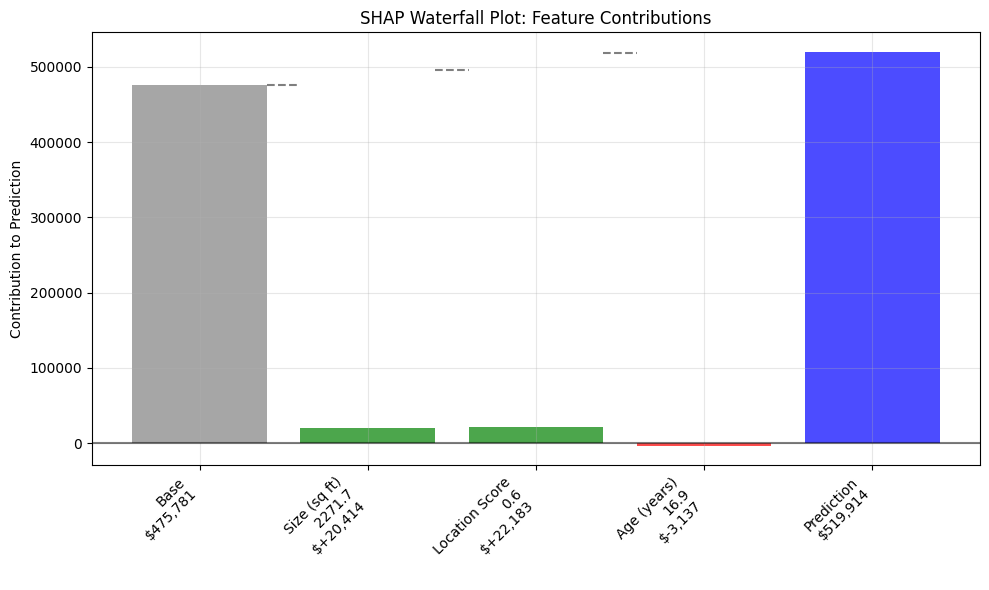

In [9]:
def plot_shap_waterfall(shap_values, feature_names, feature_values, base_value, prediction):
    """
    Create a waterfall plot showing how each feature contributes to the final prediction.
    """
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Starting point
    cumulative = base_value
    positions = []
    heights = []
    colors = []
    labels = []
    
    # Base value
    positions.append(0)
    heights.append(base_value)
    colors.append('gray')
    labels.append(f'Base\n${base_value:,.0f}')
    
    # Each feature contribution
    for i, (name, value, shap_val) in enumerate(zip(feature_names, feature_values, shap_values)):
        positions.append(i + 1)
        heights.append(shap_val)
        colors.append('green' if shap_val > 0 else 'red')
        labels.append(f'{name}\n{value:.1f}\n${shap_val:+,.0f}')
        cumulative += shap_val
    
    # Final prediction
    positions.append(len(feature_names) + 1)
    heights.append(prediction)
    colors.append('blue')
    labels.append(f'Prediction\n${prediction:,.0f}')
    
    # Create waterfall effect
    bars = ax.bar(positions, heights, color=colors, alpha=0.7)
    
    # Add connecting lines
    running_total = base_value
    for i in range(1, len(positions) - 1):
        start_y = running_total
        end_y = running_total + heights[i]
        running_total = end_y
        
        # Draw connection line
        ax.plot([positions[i-1] + 0.4, positions[i] - 0.4], 
                [start_y, start_y], 'k--', alpha=0.5)
    
    # Formatting
    ax.set_xticks(positions)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylabel('Contribution to Prediction')
    ax.set_title('SHAP Waterfall Plot: Feature Contributions')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

# Create visualization (would show plot in actual environment)
base_value = explainer.background_mean
prediction = model.predict(test_instance.reshape(1, -1))[0]

print(f"\nWaterfall plot would show:")
print(f"Base value: ${base_value:,.0f}")
for name, val, shap_val in zip(feature_names, test_instance, shap_values):
    print(f"{name} ({val:.1f}): ${shap_val:+,.0f}")
print(f"Final prediction: ${prediction:,.0f}")

plot_shap_waterfall(shap_values, feature_names, test_instance, base_value, prediction)

## When to Use SHAP

### ✅ Great for:
- **Individual predictions**: Understanding why the model made a specific decision
- **Model debugging**: Finding features that contribute unexpectedly
- **Regulatory compliance**: Providing explainable AI for high-stakes decisions
- **Feature importance**: Understanding global feature importance through aggregation
- **Model comparison**: Comparing how different models use features

### ⚠️ Limitations:
- **Computational cost**: Can be expensive for complex models and many features
- **Feature dependencies**: Assumes features can be independently "turned off"
- **Background data**: Results depend on choice of baseline/background dataset
- **Correlation issues**: May not handle highly correlated features optimally

## Advanced Topics

### Conditional vs Marginal Expectations

SHAP typically uses marginal expectations (replacing missing features with background averages), but conditional expectations might be more appropriate when features are correlated.

### SHAP Interaction Values

Beyond individual feature importance, SHAP can compute interaction effects between pairs of features:

$$\phi_{i,j} = \frac{1}{2}\sum_{S \subseteq N \setminus \{i,j\}} \frac{|S|!(n-|S|-2)!}{(n-1)!}[v(S \cup \{i,j\}) - v(S \cup \{i\}) - v(S \cup \{j\}) + v(S)]$$

### Clustered SHAP

For datasets with many features, features can be clustered and SHAP values computed for clusters to reduce complexity.

## Conclusion

SHAP provides a principled, theoretically grounded approach to understanding machine learning predictions. By borrowing from cooperative game theory, it offers a fair way to attribute credit to each feature for any given prediction.

The key insight is treating prediction explanation as a fair division problem: given that multiple features worked together to produce a prediction, how do we fairly distribute the credit among them?

While computationally expensive in its exact form, various approximations and specialized algorithms make SHAP practical for real-world applications, providing both local explanations for individual predictions and global insights into model behavior.

Remember: SHAP values tell you **how much each feature contributed to this specific prediction relative to the average prediction**, making it an invaluable tool for building trust and understanding in machine learning systems.